<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Large-Language-Models/blob/main/Question_and_answer_models_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bidirectional Encoder Representation Transformer (BERT)

In [ ]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

### Load model and tokenizer

In [ ]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [ ]:
model = BertForQuestionAnswering.from_pretrained(model_name)

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Embeddings

In [ ]:
# example question and text containing the answer
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [ ]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)

In [ ]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [ ]:
tokenizer.decode(101)

'[ C L S ]'

In [ ]:
tokenizer.decode(102)

'[ S E P ]'

In [ ]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

### Model output

Get the start and end indices for the model's answer to our question.

In [ ]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(20)
tensor(23)


In [ ]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

march 24 , 1997


In [ ]:
import matplotlib as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [ ]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [ ]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

Plot the scores for the model's output for the **start_index**.  We see the highest score is at **start_index = 20**.

<ipython-input-17-60881eb94870>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


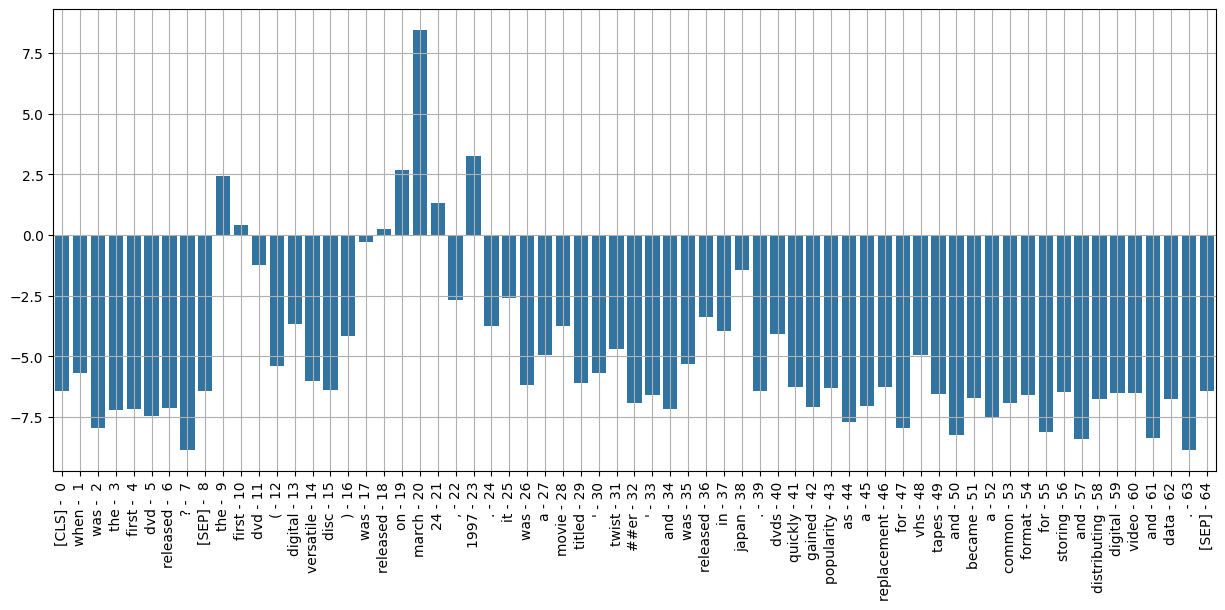

In [ ]:
# setting the dimensions of the plot
figure(figsize=(15,6))

# creating the bar plot
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

Plot the scores for the model's output for the **end_index**.  We see the highest score is at **end_index = 23**.

<ipython-input-18-6fb463a1df82>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


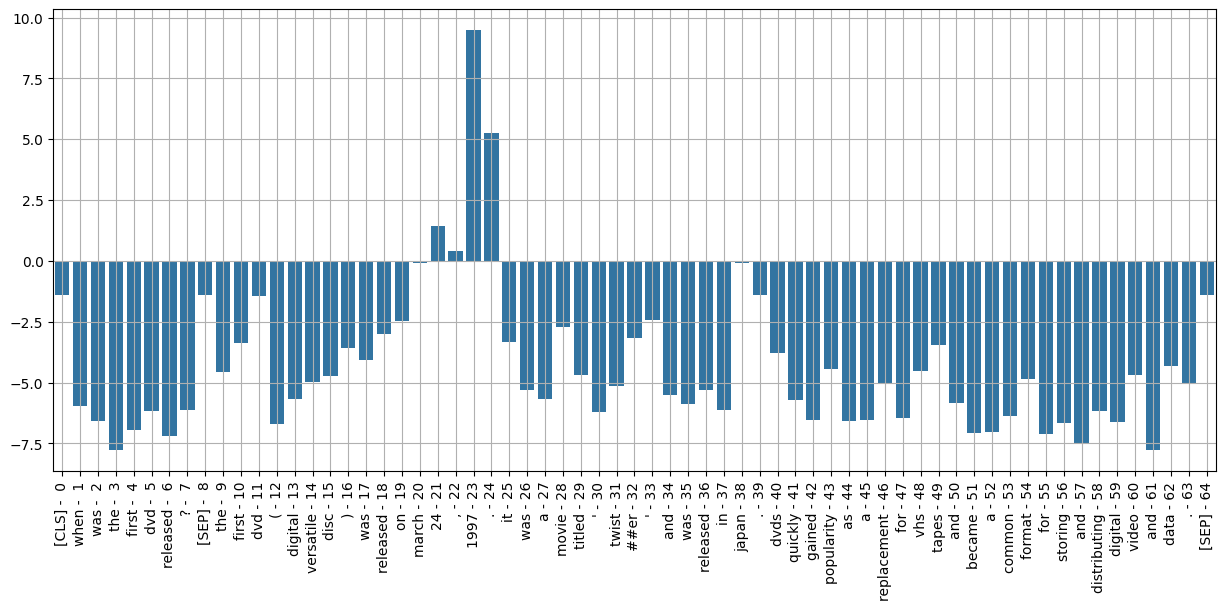

In [ ]:
# setting the dimensions of the plot
figure(figsize=(15,6))

ax = sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

### Question Answering

In [ ]:
sunset_motors_context = "Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."
print(sunset_motors_context)

Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar p

In [ ]:
def faq_bot(question):

    context = sunset_motors_context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer

In [ ]:
faq_bot("Where is the dealership located?")

' crestwood'

In [ ]:
faq_bot("what make of cars are available?")

' ford , toyota , honda , chevrolet , and bmw'

In [ ]:
faq_bot("how large is the dealership?")

' 10 acres'

## Fine Tuning

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
import numpy as np
import evaluate

In [ ]:
dataset = load_dataset("yelp_review_full")

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(len(dataset['train']))
print(len(dataset['test']))

650000
50000


In [ ]:
dataset['train'][0]

{'label': 4,
 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def tokenizer_function(examples):
    return tokenizer(examples["text"], padding = "max_length", truncation=True)

In [ ]:
tokenized_datasets = dataset.map(tokenizer_function, batched=True)

In [ ]:
small_train_dataset = tokenized_datasets['train'].shuffle(seed=42).select(range(10))
small_eval_dataset = tokenized_datasets['test'].shuffle(seed=42).select(range(10))

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

In [ ]:
training_args = TrainingArguments(output_dir="test_trainer")

In [ ]:
metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

## RoBERTa and DistilBERT

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

In [ ]:
from transformers import  DistilBertTokenizer, DistilBertModel
model_name = "distilbert-base-uncased"
tokenizer =  DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)